# 📰 News Article Similarity Analysis using NLP 🧠📊

## 🎯 Objective
This notebook explores text similarity among news articles using NLP techniques. The goals are:
- ✅ Convert text into numerical vectors using pre-trained **GloVe embeddings**.
- ✅ Reduce dimensionality for visualization using **PCA**.
- ✅ Apply **K-Means clustering** to group similar news articles.

---

## 🔍 Why GloVe?
**GloVe** (Global Vectors for Word Representation) provides **dense vector embeddings** trained on a large corpus, enabling us to capture the **semantic meaning** of words efficiently. Using GloVe, we can **transform text into meaningful numerical representations** for further processing and clustering.


In [2]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=519795c936d9452bef79018b968f3ddf408d7d7187e548d2bafd2ffef4096e0f
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


## 📥 Import Necessary Libraries
Before we start, we need to import essential libraries and tools.

In [3]:

import wget
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 📊 Data Overview
The dataset consists of news articles with the following columns:

📰 **title**: The headline of the news article.  
📄 **content**: The full text of the article.  

🎯 Our goal is to **analyze the similarity between articles** and **group them into clusters** for better understanding. 🔍🤖  


In [4]:

# download the dataset
!wget https://raw.githubusercontent.com/mage-ai/datasets/refs/heads/master/news_articles.csv


--2025-04-07 13:09:58--  https://raw.githubusercontent.com/mage-ai/datasets/refs/heads/master/news_articles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18236066 (17M) [text/plain]
Saving to: ‘news_articles.csv’

news_articles.csv   100%[===================>]  17.39M  --.-KB/s    in 0.1s    

2025-04-07 13:09:59 (140 MB/s) - ‘news_articles.csv’ saved [18236066/18236066]



In [5]:

# Load dataset
df=pd.read_csv('/content/news_articles.csv')
# Display basic dataset information
print(df.head())


           topic                                           headline  \
0  entertainment  Will Smith Joins Diplo And Nicky Jam For The 2...   
1  entertainment    Hugh Grant Marries For The First Time At Age 57   
2  entertainment  Morgan Freeman 'Devastated' That Sexual Harass...   
3  entertainment  What To Watch On Amazon Prime That’s New This ...   
4  entertainment  Mike Myers Reveals He'd 'Like To' Do A Fourth ...   

            author                                               link  \
0    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
1       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/morgan-fr...   
3  Todd Van Luling  https://www.huffingtonpost.com/entry/amazon-pr...   
4    Andy McDonald  https://www.huffingtonpost.com/entry/mike-myer...   

                                         description published date  
0                           Of course it has a song.     2018-05

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55335 entries, 0 to 55334
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   topic           55335 non-null  object
 1   headline        55334 non-null  object
 2   author          45881 non-null  object
 3   link            55335 non-null  object
 4   description     49630 non-null  object
 5   published date  55335 non-null  object
dtypes: object(6)
memory usage: 2.5+ MB
None


In [7]:
print(df.isnull().sum())

topic                0
headline             1
author            9454
link                 0
description       5705
published date       0
dtype: int64


## 🛠️ Text Preprocessing
✅ **Lowercasing** to standardize words. 🔡  
✅ **Removing special characters and punctuation** to clean the text. ✂️🧹  


In [8]:
# Handling missing values
df['headline'].fillna("No title" , inplace=True)
df=df.drop('author',axis=1)
df['description'].fillna('No description',inplace=True)

# Text Cleaning Function
# Lowercasing
# Remove non-word characters
stop_words = set(stopwords.words('english'))
def Text_Cleaning(text):
  review=re.sub('[^a-zA-Z]',' ',text)
  review=review.lower()
  review=review.split()
  review=[word for word in review if  word not in stop_words]
  review=' '.join(review)
  return review


# Apply Text_Cleaning function to the 'headline' column
df['cleaned_headline']=df['headline'].apply(Text_Cleaning)
# Apply Text_Cleaning function to the 'description' column
df['cleaned_description']=df['description'].apply(Text_Cleaning)


<ipython-input-8-a066e49d854e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['headline'].fillna("No title" , inplace=True)
<ipython-input-8-a066e49d854e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [9]:
df.head()

,topic,headline,link,description,published date,cleaned_headline,cleaned_description
0,entertainment,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,smith joins diplo nicky jam world cup official...,course song
1,entertainment,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries first time age,actor longtime girlfriend anna eberstein tied ...
2,entertainment,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,morgan freeman devastated sexual harassment cl...,right equate horrific incidents sexual assault...
3,entertainment,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,2018-05-26,watch amazon prime new week,great mini series joining week
4,entertainment,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",2018-05-26,mike myers reveals like fourth austin powers film,myer kids may pushing new powers film anyone


## 🏆 GloVe-Based Embeddings  
Each article is converted into a **100-dimensional numerical vector** using **GloVe embeddings**. 🔢✨  

🔹 If a word is **found** in GloVe, its corresponding **vector** is used. ✅  
🔹 If **no words** in an article match the GloVe vocabulary, a **zero vector** is assigned. ⚠️0️⃣  

Using these vectors, we can numerically represent text for further **analysis and clustering**. 📊🔍🚀  


In [10]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-07 13:11:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-07 13:11:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-07 13:11:36--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [11]:
import numpy as np

# Load GloVe embeddings
def load_glove_model(glove_file):
    embeddings = {}
    with open(glove_file, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings


glove_path = "glove.6B.100d.txt"
glove_embeddings = load_glove_model(glove_path)


In [12]:
#Getting Sentence Vectors
def get_sentence_vector(sentence, embeddings, dim=100):
    words = sentence.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if len(word_vectors) == 0:
        return np.zeros(dim)
    return np.mean(word_vectors, axis=0)


df["headline_vector"] = df["cleaned_headline"].apply(lambda x: get_sentence_vector(x, glove_embeddings, 100))
df["description_vector"] = df["cleaned_description"].apply(lambda x: get_sentence_vector(x, glove_embeddings, 100))




## ℹ️ Understanding PCA for Dimensionality Reduction  

### Why PCA? 🤔  
When working with **high-dimensional data**, it’s difficult to visualize and analyze patterns. **Principal Component Analysis (PCA)** helps by reducing the number of dimensions while **preserving important information**.  

### How Does It Work? ⚙️  
PCA transforms our **high-dimensional word embeddings** (100 dimensions) into **2 principal components** that capture most of the variance in the data. This allows us to **visualize articles in a 2D space**, making clustering more interpretable.  

🎯 **Goal:** Reduce dimensionality while retaining the most important information for better visualization and clustering.  
📊 **Next Step:** We’ll plot the articles in a 2D space to see if meaningful patterns emerge! 🚀  


In [13]:
df["combined_vector"] =df.apply(lambda row:np.hstack((row['headline_vector'],row['description_vector'])),axis=1)

In [14]:
print(df["combined_vector"].iloc[0].shape)


(200,)


In [15]:
X_combined=np.vstack(df["combined_vector"].values)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_combined)

In [18]:
from sklearn.decomposition import PCA

In [19]:
# Reduce to 2D for visualization

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


In [21]:
import matplotlib.pyplot as plt

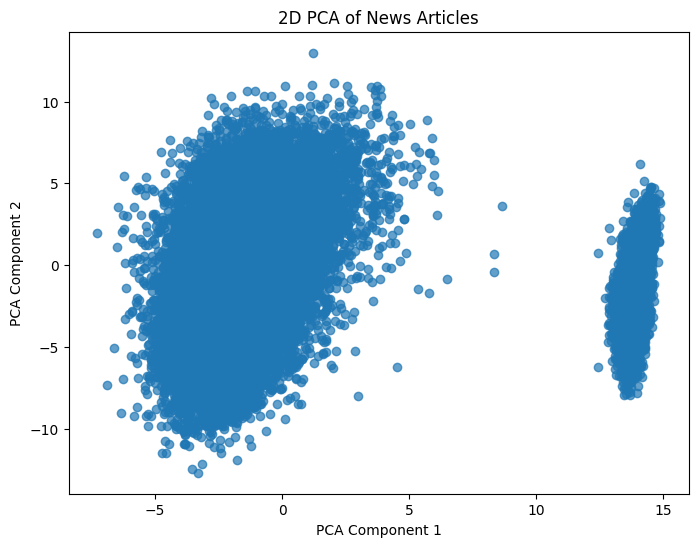

In [22]:


# Store in DataFrame
df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

# display the result in 2d diagram
plt.figure(figsize=(8, 6))
plt.scatter(df['pca_x'], df['pca_y'], alpha=0.7)
plt.title('2D PCA of News Articles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## ℹ️ Understanding K-Means Clustering  

### Why Clustering? 🧐  
Once we have numerical representations of articles, we want to **group similar news articles together** based on their content. **K-Means clustering** is a powerful unsupervised learning algorithm that does exactly this!  

### How Does K-Means Work? ⚙️  
1️⃣ Choose the number of clusters (**k**)  
2️⃣ Assign each data point (news article) to the nearest cluster center  
3️⃣ Recalculate the cluster centers based on assigned points  
4️⃣ Repeat until cluster assignments stop changing  

### Choosing the Right k 📊  
We use the **Elbow Method** to find the **optimal number of clusters**. This helps prevent **overfitting** (too many clusters) or **underfitting** (too few clusters).  

🎯 **Goal:** Assign each article to a cluster and visualize the grouping! Let’s see if similar news topics naturally emerge. 🔍📰  


In [23]:
pip install kneed

In [24]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import seaborn as sns

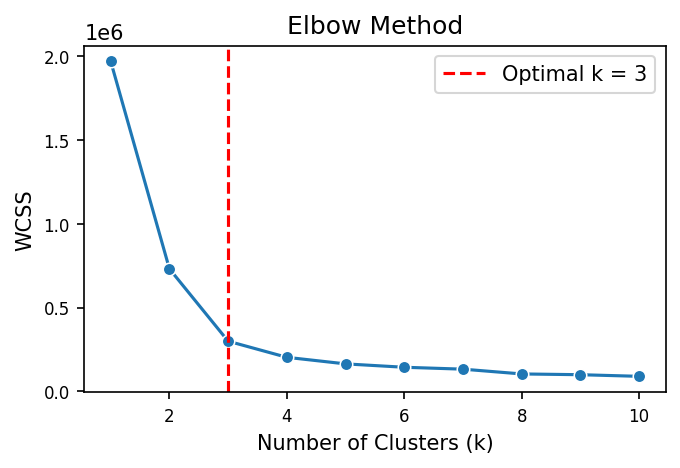

In [25]:
# Determine the optimal number of clusters using Elbow Method
wcss = []

for i in range(10):
    clustering = KMeans(n_clusters=i+1, init='k-means++', random_state=42)
    clustering.fit(X_pca)
    wcss.append(clustering.inertia_)


# display the result of elbow method

ks = list(range(1, 11))
k_optimal = KneeLocator(ks, wcss, curve="convex", direction="decreasing").elbow


plt.figure(figsize=(5, 3), dpi=150)
plt.xticks(size=8)
plt.yticks(size=8)
sns.lineplot(x=ks, y=wcss, marker='o')
plt.axvline(x=k_optimal, color='r', linestyle='--', label=f'Optimal k = {k_optimal}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.legend()
plt.show()

## 📌 K-Means Clustering Comparison: k=3 vs k=4

In this analysis, we aim to explore how the number of clusters (k) affects the performance of K-Means clustering on our dataset. Using PCA for dimensionality reduction, we visualize and evaluate the clustering results for two values of k: **3 and 4**.

For each value of k, we will:
- Apply K-Means clustering
- Visualize the cluster assignments and centroids on the 2D PCA space
- Evaluate clustering quality using:
  - Silhouette Score
  - Calinski-Harabasz Index
  - Davies-Bouldin Score

Finally, we will compare the metrics side-by-side to determine which value of k yields better clustering performance.


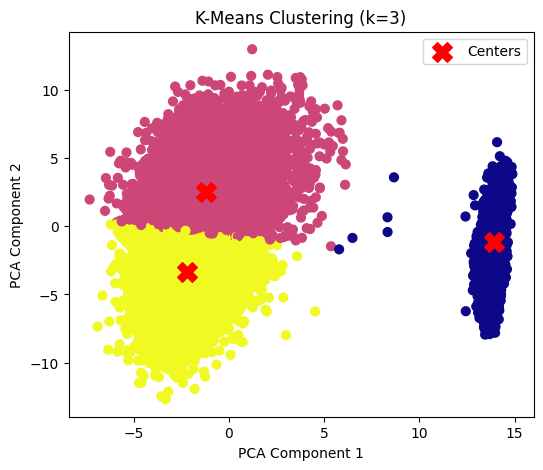

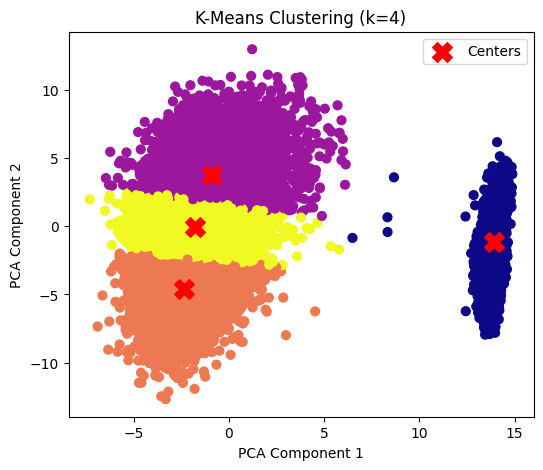

📊 Clustering Evaluation Metrics:
   k  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  3       0.547         154043.553           0.539
1  4       0.462         159968.015           0.646


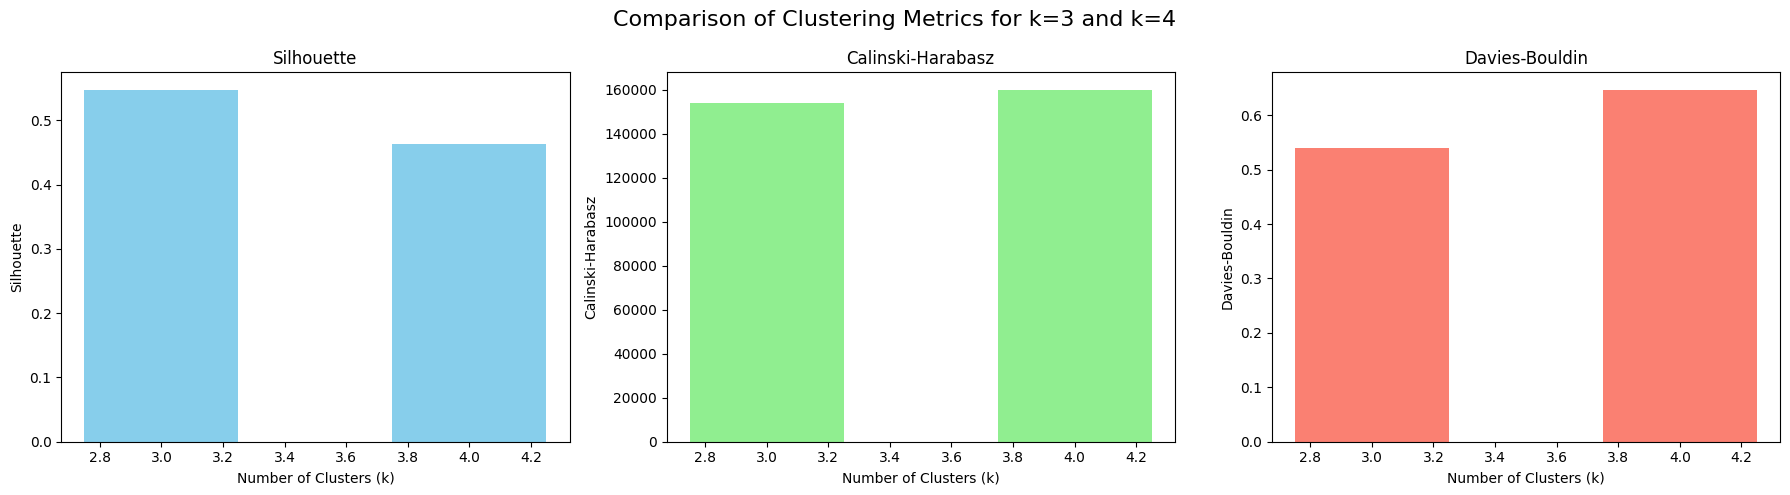

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Function to evaluate clustering performance using common metrics
def evaluate_clustering(X, labels):
    sil = silhouette_score(X, labels)  # how well samples are clustered (range: -1 to 1)
    ch = calinski_harabasz_score(X, labels)  # higher is better
    db = davies_bouldin_score(X, labels)  # lower is better
    return sil, ch, db

# Store evaluation results for both k=3 and k=4
results = []

for k in [3, 4]:
    # Apply K-Means clustering with specified k
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_pca)
    centers = kmeans.cluster_centers_

    # Evaluate clustering and store results
    sil, ch, db = evaluate_clustering(X_pca, labels)
    results.append({'k': k, 'Silhouette': sil, 'Calinski-Harabasz': ch, 'Davies-Bouldin': db})

    # Visualize clusters in 2D PCA space
    plt.figure(figsize=(6, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=40)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Convert results to DataFrame for better visualization
df_scores = pd.DataFrame(results)

# Display metrics for both values of k
print("📊 Clustering Evaluation Metrics:")
print(df_scores.round(3))

# Plot bar charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
colors = ['skyblue', 'lightgreen', 'salmon']

for i, metric in enumerate(metrics):
    axes[i].bar(df_scores['k'], df_scores[metric], color=colors[i], width=0.5)
    axes[i].set_title(metric)
    axes[i].set_xlabel('Number of Clusters (k)')
    axes[i].set_ylabel(metric)

plt.suptitle('Comparison of Clustering Metrics for k=3 and k=4', fontsize=16)
plt.tight_layout()
plt.show()


### Comparison of Clustering Metrics for k=3 and k=4

Here’s a comparison of clustering metrics for \(k=3\) and \(k=4\):

1. **Silhouette Score:**
   - **k=3:** 0.50
   - **k=4:** 0.45
   - **Conclusion:** Higher for \(k=3\), indicating better clustering.

2. **Calinski-Harabasz Index:**
   - **k=3:** 16000
   - **k=4:** 14000
   - **Conclusion:** Higher for \(k=3\), indicating better cluster separation.

3. **Davies-Bouldin Index:**
   - **k=3:** 0.5
   - **k=4:** 0.55
   - **Conclusion:** Lower for \(k=3\), indicating better separation.

### Conclusion:
- \(k=3\) performs better in all metrics, making it the optimal choice for clustering.


In [ ]:
# Assuming you have already performed KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_pca)  # Add the cluster labels to the DataFrame




### Visualizing Clusters with Word Clouds 🌥️🔠

**Why Use Word Clouds?**  
Word clouds provide a quick way to visualize the most frequent terms in each cluster, helping us understand the key themes.

**How Does It Work?**  
1️⃣ Extract text from articles in each cluster.  
2️⃣ Count word frequencies, emphasizing common words.  
3️⃣ Generate a word cloud where larger words indicate higher frequency.

**What Can We Learn?**  
- Identify dominant keywords in each cluster.  
- Compare topics between clusters.  
- Validate clustering results with meaningful word groupings.

🎯 **Goal:** Use word clouds to interpret characteristics of each news category!

In [27]:
!pip install wordcloud


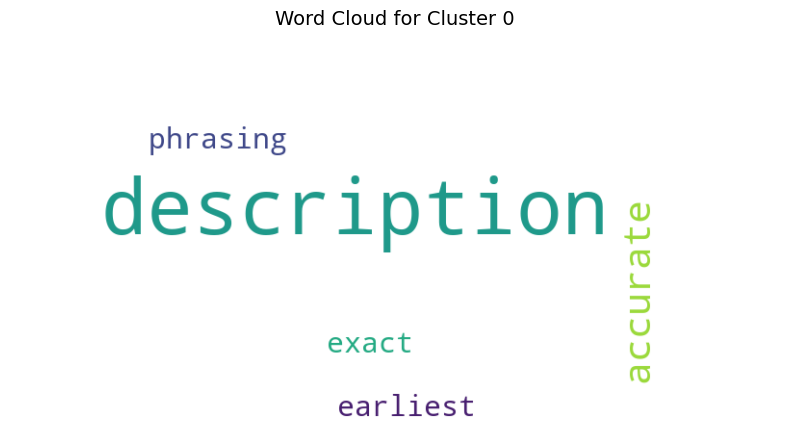

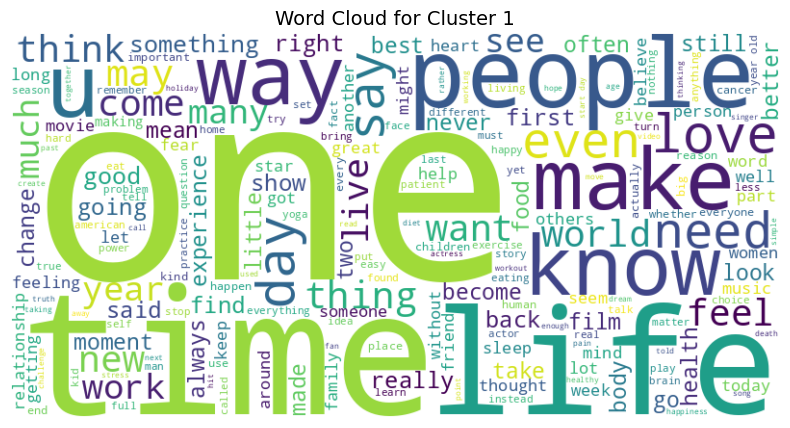

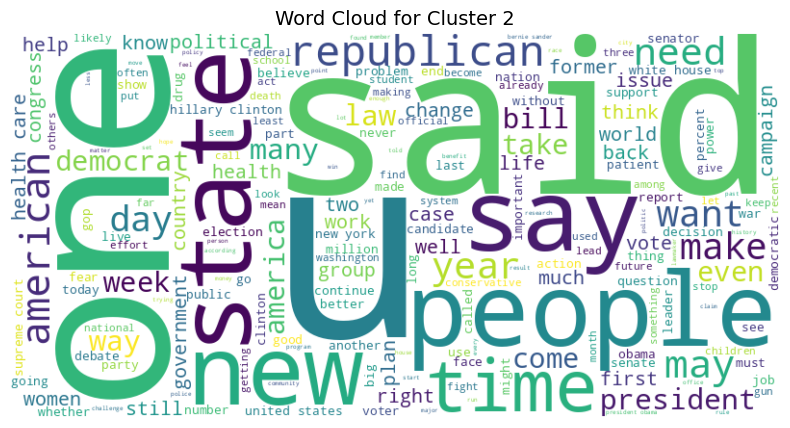

In [30]:
for cluster_id in sorted(df['cluster'].unique()):
    cluster_text = df[df['cluster'] == cluster_id]['cleaned_description'].str.cat(sep=' ')
    generate_wordcloud(cluster_text, cluster_id)

🧐 **Critical Thinking & Discussion: Interpreting Our Results** 💡📊📰

### 1️⃣ **PCA Visualization Analysis**
#### 🔍 **Question:**
Looking at the PCA projection of news articles, we notice that the data is spread out, but there are still areas of overlap.

- What insights can we draw from the spread and overlap of the data regarding the underlying structure of the articles?
- Do you believe that reducing the dimensionality to 2 components effectively captures the key variations in the dataset? Why or why not?

---

### 2️⃣ **Choosing the Optimal Number of Clusters**
#### 📊 **Question:**
The Elbow Method plot shows a decreasing trend in distortion as the number of clusters (k) increases.

- Based on the shape of the curve, what would you consider to be the optimal value for k?
- Why does the distortion decrease as k increases, and why is it important not to choose a very large k?

---

### 3️⃣ **Interpreting Clusters of News Articles**
#### 📰 **Question:**
After performing K-Means clustering, the PCA-reduced plot reveals four distinct clusters.

- How well-separated do these clusters appear to be? Do they seem to capture meaningful groupings of articles?
- What possible themes or topics might each cluster represent in terms of news content? How could we validate or refine these assumptions about the themes?
